In [12]:
import requests
import pandas as pd
import json
from datetime import date

### Let's set up a list of counties close to major rivers. we will focus on the following major US river for now: 
[Counties on Mississippi River](https://en.wikipedia.org/wiki/Category:Mississippi_River_counties)

In [25]:
# first we will focus on Louisiana
la_parish_on_mississippi = ['Ascension', 'Concordia', 'East Baton Rouge', 'East Carroll', 'East Feliciana', 'Iberville', 'Jefferson', 
                            'Madison', 'New Orleans', 'Plaquemines', 'Pointe Coupee', 'St. James', 'Saint James', 'St. John The Baptist', 
                            'Saint John The Baptist', 'St. Bernard' , 'Saint Bernard', 'Tensas', 'West Baton Rouge', 'West Feliciana']

# adding the word "Parish and capitlizing all words
la_pars_on_river = [county + " Parish" for county in la_parish_on_mississippi]
la_pars_on_river = [county.upper() for county in la_pars_on_river]


print(la_pars_on_river)


['ASCENSION PARISH', 'CONCORDIA PARISH', 'EAST BATON ROUGE PARISH', 'EAST CARROLL PARISH', 'EAST FELICIANA PARISH', 'IBERVILLE PARISH', 'JEFFERSON PARISH', 'MADISON PARISH', 'NEW ORLEANS PARISH', 'PLAQUEMINES PARISH', 'POINTE COUPEE PARISH', 'ST. JAMES PARISH', 'SAINT JAMES PARISH', 'ST. JOHN THE BAPTIST PARISH', 'SAINT JOHN THE BAPTIST PARISH', 'ST. BERNARD PARISH', 'SAINT BERNARD PARISH', 'TENSAS PARISH', 'WEST BATON ROUGE PARISH', 'WEST FELICIANA PARISH']


We are wanting to set up process of extracting information via the envirofacts API on the EPA website
First, let's focus on the green house gas data sets and then let us focus on Louisiana Specifically

API CALL EXAMPLE: https://data.epa.gov/efservice/tri_facility/state_abbr/>/VA/tri_reporting_form/tri_chem_info/rows/0:2/excel

[tri_facility] = table name, at least one table name required. up to 3 can be inputted
[state_abbr] = column name, optional
[>], =, !=, <, BEGINNING, CONTAINING = optional entry
[VA] = optional entry
[rows/0:2] = optional entry. 'rows/<first_row>:<last_row>
[excel] = default option is xml format, however can output JSON, CSV, EXCEL
[count] = optional, counts total number of record that will be returned for this search. when count is used, cant us EXCEL, CSV or XML.




In [13]:
# let's set up some regularly updating objects that we will use in data analysis process
today = date.today()
print(f'{today}')


2024-09-18


In [7]:
# example of what api structure looks like
table_name = 'tri_facility'
state_abbr = 'LA'
output_type = 'JSON'

base_url = f'https://data.epa.gov/efservice/{table_name}/state_abbr/{state_abbr}/{output_type}'

print(base_url)

https://data.epa.gov/efservice/tri_facility/state_abbr/LA/JSON


In [16]:
# let's make our first get request
response = requests.get(url=base_url)

# data pull in json format
results_json = json.dumps(response.json())

# converting into a pandas df
results_df = pd.read_json(results_json)

# let's output our datafile to its easier to go through 
results_fname = f'envirofacts_data_pull_{today}.csv'
results_df.to_csv(f'output_check/{results_fname}', index=False)

print(results_df)

     tri_facility_id                           facility_name  \
0    70001BRDNNA1751                  BORDEN INC. DAIRY DIV.   
1    70001DLTPT3011L         SAFETY-KLEEN SYSTEMS - METAIRIE   
2    70001LFRGN332AI         HOLCIM - SOR INC. - AIRLINE RMX   
3    70003BRTMR721AI                     BARTO MARBLE CO INC   
4    7000WBRDWL6825A       BOARDWALK LOUISIANA MIDSTREAM LLC   
..               ...                                     ...   
947  71483CHMBNHIGHW                          ARCLIN USA LLC   
948  71483LLBRWTHOMA                    HIXSON LUMBER CO LLC   
949  71486WLLMTLAHWY           WEYERHAEUSER NR CO ZWOLLE DIV   
950  7148WLSLLB4915H                   LASALLE BIOENERGY LLC   
951  7148WLSLLL2189L  LASALLE LUMBER CO LLC - URANIA SAWMILL   

                         street_address   city_name       county_name  \
0                    A1751 AIRLINE HWY.    METAIRIE  JEFFERSON PARISH   
1                       3000 AIRLINE DR    METAIRIE  JEFFERSON PARISH   
2           

C:\Users\AngelSalazar\AppData\Local\Temp\ipykernel_25860\3876616887.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_df = pd.read_json(results_json)


In [31]:
# now let's filter out any facilities that are not located in a county/parish adjacent to the mississippi river
la_facils_near_river = results_df[results_df['county_name'].isin(la_pars_on_river)]

# resetting index
la_facils_near_river.reset_index()

# output as csv file so we can check
la_facils_near_river.to_csv(f'output_check/la_facilities_near_mriver_{today}.csv', index=False)

print(la_facils_near_river)

     tri_facility_id                       facility_name  \
0    70001BRDNNA1751              BORDEN INC. DAIRY DIV.   
1    70001DLTPT3011L     SAFETY-KLEEN SYSTEMS - METAIRIE   
2    70001LFRGN332AI     HOLCIM - SOR INC. - AIRLINE RMX   
3    70003BRTMR721AI                 BARTO MARBLE CO INC   
4    7000WBRDWL6825A   BOARDWALK LOUISIANA MIDSTREAM LLC   
..               ...                                 ...   
848  7125WMYRNT525PR                        MYRIANT CORP   
860  71276BRNSHPOBOX  BARNES HARDWOOD INC SONDHEIMER DIV   
865  71282CMPLXPOBOX            COMPLEX CHEMICALS CO INC   
866  71282MCKNNHWY80     MCKINNEY OIL CO OF TALLULAH INC   
912  71371LCNDSJUCTI           BASF CORP - VIDALIA WORKS   

                                        street_address        city_name  \
0                                   A1751 AIRLINE HWY.         METAIRIE   
1                                      3000 AIRLINE DR         METAIRIE   
2                                      3320 AIRLINE DR

we now have data on facilities that we want so let's plot it on a louisian map...

In [33]:
import geopandas as gpd
import matplotlib.pyplot as plt

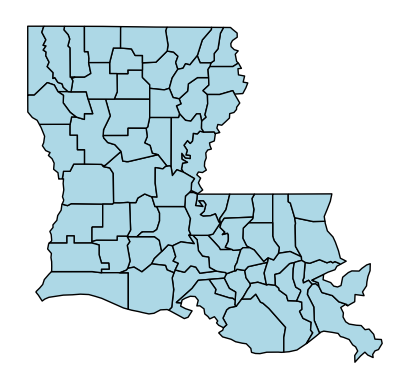

In [38]:
# loading in map of louisiana
us_gdf = gpd.read_file('input_files/cb_2023_us_county_20m.shp')

# converting to crs 
us_gdf = us_gdf.to_crs('EPSG:3857')

# now condensing data to only lousiana
la_gdf = us_gdf[us_gdf['STATE_NAME']=='Louisiana']

# plotting our louisiana map by county
la_parishes = la_gdf.plot(color='lightblue', edgecolor='black')
la_parishes.set_axis_off()


plt.show()

In [ ]:
# let's convert our facility df into a geopandas df so we can visualize it
la_facils_near_river_gdf = gpd.GeoDataFrame(la_facils_near_river, 
                                            geometry=gpd.points_from_xy(df[]))